In [23]:
from __future__ import print_function, division

%matplotlib inline
import pandas as pd
import numpy as np
import nsfg
import brfss
import matplotlib
import thinkstats2
import thinkplot
import scipy

In [46]:
resp = nsfg.ReadFemResp()
timesmar = resp['timesmar'].dropna()
jintendn = resp['jintendn'].dropna()

## Question 1

In [25]:
mt, st = timesmar.mean(), timesmar.std()
mt, st

(1.387057682985943, 4.297113023252983)

In [26]:
mj, sj = jintendn.mean(), jintendn.std()
mj, sj

(2.7052556818181817, 9.710108051456992)

In [27]:
npdft = thinkstats2.NormalPdf(mt, st)
npdfj = thinkstats2.NormalPdf(mj, sj)

pmft = npdft.MakePmf()
pmfj = npdfj.MakePmf()

npdfj.Density(mj + sj), npdft.Density(mt + st)

(0.0249194677584289, 0.05631006752900525)

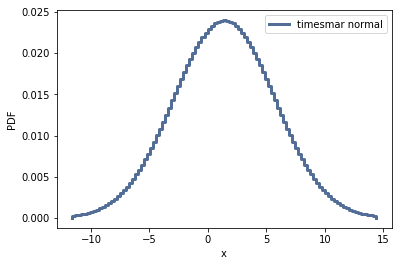

In [28]:
thinkplot.Pmf(pmft, label='timesmar normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

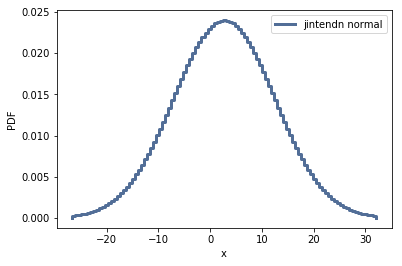

In [29]:
thinkplot.Pmf(pmfj, label='jintendn normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

### Standard deviation difference between these two variables clearly seen like 9.7-4.2 but still means are close to each others.

## Question 2

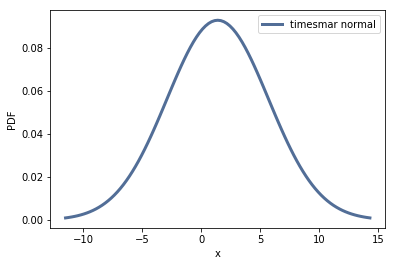

In [30]:
thinkplot.Pdf(npdft, label='timesmar normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

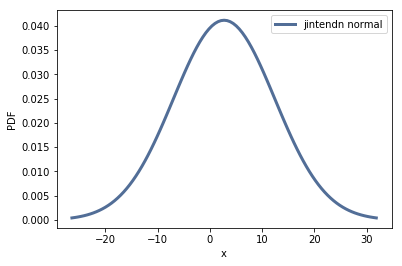

In [31]:
thinkplot.Pdf(npdfj, label='jintendn normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

In [32]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sum_list = [(x - mean)**k for x in xs]
    return sum(sum_list) / len(sum_list)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(timesmar), Skewness(jintendn)

(22.219307220678285, 9.686914057933583)

In [33]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

PearsonMedianSkewness(timesmar), PearsonMedianSkewness(jintendn)

(0.27025442021022084, 0.5270368429720083)

### Both distrubutions skewed right since they have positive skewness and means are greater than medians. However, it looks like timesmar variable is more strong according to Skewness which is depends strongly on a few outliers but Pearson median skewnes which is more robust showed that jintendn variable more strongly right skewed

## Question 3

In [34]:
timesmar2 = resp['timesmar']
jintendn2 = resp['jintendn']

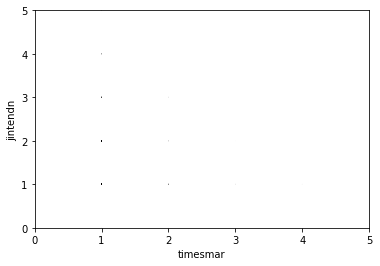

In [35]:
thinkplot.Scatter(timesmar2, jintendn2, alpha=0.01, s=2, color='black')
thinkplot.Config(xlabel='timesmar',
                 ylabel='jintendn',
                 axis=[0,5,0,5],
                 legend=False)

In [36]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

timesmarj = Jitter(timesmar2, 1.4)
jintendnj = Jitter(jintendn, 2)

In [37]:
var = resp.dropna(subset=['timesmar', 'jintendn'])

In [38]:
bins = np.arange(0, 10, 1)
print(bins)
indices = np.digitize(var.timesmar, bins)
print(indices)
groups = var.groupby(indices)
print(groups)

[0 1 2 3 4 5 6 7 8 9]
[2 2 3 ... 2 2 3]


In [39]:
for i, group in groups:
    print(i, len(group))

2 992
3 73
4 7
5 2


In [40]:
mean = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]
mean

[1.0, 2.0, 3.0, 4.0]

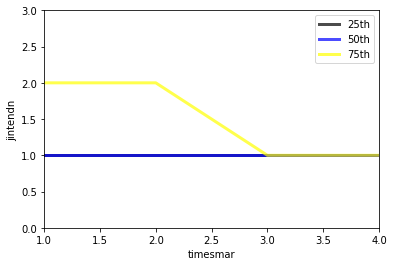

In [41]:
CustomColors = ["black","blue","yellow"]
percent = [25, 50, 75]
for i in range(len(percent)):
    percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean, percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='timesmar',
                 ylabel='jintendn',
                 axis=[1,4,0,3],
                 legend=True)

## Question 4

In [52]:
# Refference https://machinelearningmastery.com/handle-missing-data-python/
resp1 = nsfg.ReadFemResp().replace("0", np.nan)
time = resp1['timesmar']
jin =resp1['jintendn']

scipy.stats.spearmanr(time,jin), scipy.stats.pearsonr(time,jin)

(SpearmanrResult(correlation=nan, pvalue=nan), (nan, 1.0))

### Diffrence between pearson and spearman is that pearson gives 1 only if the decreasing or increasing amount is consistent, straight line but the spearmans could give 1 even amount of decreasing or increasing not consistent.